In [1]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
using LinearAlgebra
using Random
using DifferentialEquations
include("../Potential/starobinsky.jl")
include("../inflationBasicEqs.jl")
include("../inflationSDE.jl")
include("../sampling.jl")

SampleNTotAdd2Paths (generic function with 1 method)

In [2]:
Random.seed!(1)

TaskLocalRNG()

In [3]:
dN = 0.001
h0 = 1e-5
V0 = 3 * h0^2
APlus = sqrt(9 * h0^6 / (4 * pi^2 * 8.5e-10))
AMinus = APlus / 1700
phi0 = 0
phiIni = 1.93e-2
vIni = -5.45e-7
nPath = 1000000
iniVec = [phiIni, vIni, 0]
sigma = 0.1
phiEnd = -1.87e-2

potFunc = makePotFuncStarobinsky(V0, APlus, AMinus, phi0)
potDerFunc = makePotDerFuncStarobinsky(APlus, AMinus, phi0)

driftFunc, volFunc = makeDriftAndVolFunc(
    potFunc, potDerFunc, nothing, nothing,
    infPSType="Starobinsky", additionalParams=Dict("phiEnd"=>phiEnd, "APlus"=>APlus, "AMinus"=>AMinus, "phi0"=>phi0, "sigma"=>sigma))

(var"#drift!#15"{var"#f#1"{Float64, Float64, Float64, Int64}, var"#f#2"{Float64, Float64, Int64}, Float64}(var"#f#1"{Float64, Float64, Float64, Int64}(3.0000000000000005e-10, 1.637690853521794e-11, 9.63347560895173e-15, 0), var"#f#2"{Float64, Float64, Int64}(1.637690853521794e-11, 9.63347560895173e-15, 0), -0.0187), var"#vol!#17"{var"#f#1"{Float64, Float64, Float64, Int64}, var"#f#2"{Float64, Float64, Int64}, Float64, Int64, var"#14#16"{var"#f#1"{Float64, Float64, Float64, Int64}, Float64, Float64, Int64, Float64}}(var"#f#1"{Float64, Float64, Float64, Int64}(3.0000000000000005e-10, 1.637690853521794e-11, 9.63347560895173e-15, 0), var"#f#2"{Float64, Float64, Int64}(1.637690853521794e-11, 9.63347560895173e-15, 0), -0.0187, 0, var"#14#16"{var"#f#1"{Float64, Float64, Float64, Int64}, Float64, Float64, Int64, Float64}(var"#f#1"{Float64, Float64, Float64, Int64}(3.0000000000000005e-10, 1.637690853521794e-11, 9.63347560895173e-15, 0), 1.637690853521794e-11, 9.63347560895173e-15, 0, 0.1)))

In [4]:
NsPsMin = 10.0
NsPsMax = 15.0
NSimEnd = 20.0

20.0

In [5]:
NTotFilePath = "NTot.csv"
NTotDf = SampleNTotAdd2Paths(nPath, iniVec, NSimEnd, [NsPsMin, NsPsMax], driftFunc, volFunc, dN, NTotFilePath, discScheme=SRIW2())

iPath=1 :2025-04-23T19:17:34.516
iPath=1001 :2025-04-23T19:18:51.758
iPath=2001 :2025-04-23T19:19:57.745
iPath=3001 :2025-04-23T19:20:55.825
iPath=4001 :2025-04-23T19:21:54.272
iPath=5001 :2025-04-23T19:22:52.150
iPath=6001 :2025-04-23T19:23:50.100
iPath=7001 :2025-04-23T19:24:45.902
iPath=8001 :2025-04-23T19:25:41.645
iPath=9001 :2025-04-23T19:26:38.727
iPath=10001 :2025-04-23T19:27:40.024
iPath=11001 :2025-04-23T19:28:43.440
iPath=12001 :2025-04-23T19:29:43.584
iPath=13001 :2025-04-23T19:30:42.414
iPath=14001 :2025-04-23T19:31:43.028
iPath=15001 :2025-04-23T19:32:50.108
iPath=16001 :2025-04-23T19:33:50.479
iPath=17001 :2025-04-23T19:34:48.941
iPath=18001 :2025-04-23T19:35:46.967
iPath=19001 :2025-04-23T19:36:45.609
iPath=20001 :2025-04-23T19:37:43.052
iPath=21001 :2025-04-23T19:38:39.874
iPath=22001 :2025-04-23T19:39:36.823
iPath=23001 :2025-04-23T19:40:33.483
iPath=24001 :2025-04-23T19:41:31.451
iPath=25001 :2025-04-23T19:42:29.942
iPath=26001 :2025-04-23T19:43:28.845
iPath=27001 :2

Row,NBk,NTot1,NTot2,phi_vel_vec_elem1,phi_vel_vec_elem2,phi_vel_vec_elem3
,Float64,Float64,Float64,Float64,Float64,Float64
1,11.7462,17.115,17.068,-0.0183237,-3.21267e-10,0.355
2,10.964,16.935,17.062,-0.0183448,-3.21147e-10,0.355
3,10.8386,16.794,16.801,-0.0183482,-3.21145e-10,0.355
4,10.0068,16.71,16.585,-0.0183771,-3.21119e-10,0.355
5,10.0623,16.772,16.78,-0.018368,-3.21122e-10,0.355
6,13.1161,16.873,16.776,-0.0182761,-3.40322e-10,0.355
7,14.5017,16.859,17.18,-0.0182311,-7.44476e-10,0.355
8,13.6528,16.786,17.047,-0.0182486,-5.10017e-10,0.355
9,13.3071,16.621,16.764,-0.0182692,-3.58053e-10,0.355


In [8]:
include("../fitting.jl")

FitByBinAve (generic function with 1 method)

In [9]:
# First, fit by the logistic function, and use the resultant parameters as initial parameters in fitting by the logistic+linear function
fitResultLogit, delNSqFitLogit, psFitLogit, delNSqErrLogit, psErrLogit = FitByLS(NTotDf, "logistic", 4, NsPsMin, NsPsMax)

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.03680239780807601, -3.100475637155739, -4.27560519486079, -3.0525729652008313, -1.593059942204929, -0.4225805166468145], [0.02807499575388486, 0.019154824798658005, 0.026831851489873257, 0.016845195199611786, 0.024717233764220116, 0.02916271396637002, -0.014730864544935725, 0.001865101626172344, 0.024483606379299278, -0.005350664692337255  …  -0.040043895403357024, 0.00397245257968986, 0.035584467639712965, 0.03428141082992321, 0.03573318320574619, 0.0327516747049581, -0.0687660674007287, 0.01852848121146124, 0.004479403683671293, -0.08656538632041114], [0.792869418619358 -0.006043965919896706 … -0.0023193498942837014 -0.0004245149940024146; 0.7396073739712862 -0.007087711463056182 … -0.0024225870202368807 0.002956607577428058; … ; 0.8529716962313925 -0.004615424836535477 … 9.142245450889225e-5 -0.0017277650083827236; 0.7520328926446924 -0.00686

In [10]:
fitResultLogit.param

6-element Vector{Float64}:
  0.03680239780807601
 -3.100475637155739
 -4.27560519486079
 -3.0525729652008313
 -1.593059942204929
 -0.4225805166468145

In [11]:
confidence_interval(fitResultLogit, 0.05)

6-element Vector{Tuple{Float64, Float64}}:
 (0.036591258968662985, 0.037013536647489034)
 (-3.5094821342320204, -2.691469140079458)
 (-5.222613238756137, -3.328597150965444)
 (-4.041966513289354, -2.0631794171123095)
 (-2.2467740079645564, -0.9393458764453017)
 (-0.6732447618888382, -0.17191627140479088)

In [12]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitValsLogit = [delNSqFitLogit(N) for N in NsPS]
psFitValsLogit = [psFitLogit(N) for N in NsPS]
delNSqErrValsLogit = [delNSqErrLogit(N) for N in NsPS]
psErrValsLogit = [psErrLogit(N) for N in NsPS]

100-element Vector{Float64}:
 NaN
   0.0011140605451695946
   0.0009696873931054414
   0.0008369570048056263
   0.0007161142002699216
   0.0006074056682879446
   0.0005111324190195456
   0.00042770703643872816
   0.0003576953143391993
   0.0003017770020162968
   0.0002604907848107525
   0.0002336457157460472
   0.00021963350121511794
   ⋮
   7.745335948185187e-5
   6.236060929211078e-5
   4.9223007352895276e-5
   3.808227985184773e-5
   2.887127153231466e-5
   2.1442339752829944e-5
   1.5595618858323605e-5
   1.1104665646067779e-5
   7.73780532529292e-6
   5.274320070857055e-6
   3.5153566120355224e-6
 NaN

In [13]:
NBksBin = LinRange(NsPsMin, NsPsMax, 11)
delNSqBinAve, psBinAve, delNSqBinAveErr, psBinAveErr, NBksdelNSq, NBksPS = FitByBinAve(NTotDf, NBksBin)

(Any[0.02522917716824208, 0.026488480186941363, 0.028000827815434556, 0.029159364495322346, 0.030658420373023722, 0.032106452882434355, 0.0344489457759558, 0.03626712027402287, 0.03656954786280764, 0.03684021264715769], [0.00251860603739857, 0.0030246952569863844, 0.00231707335977558, 0.002998111755402752, 0.002896065018821267, 0.004684985787042892, 0.003636348996134131, 0.0006048551775695438, 0.000541329568700108], Any[0.00011256962678443075, 0.00011904613492988017, 0.00012627015208927363, 0.00012951587958397705, 0.0001371684814423256, 0.00014347021558180315, 0.00015437557437905636, 0.00016225633273624532, 0.0001633894964216921, 0.00016489668152184825], [0.00032768218209801563, 0.0003470800112388584, 0.0003617651966293028, 0.0003773038847698489, 0.0003969830981806792, 0.0004214998017743431, 0.0004479238126194173, 0.0004605355363224397, 0.0004642716580531359], LinRange{Float64}(10.25, 14.75, 10), LinRange{Float64}(10.5, 14.5, 9))

In [14]:
psDfMS = CSV.read("calPlin_Starobinsky.csv", DataFrame, header=false)
NTotAve = mean([mean(NTotDf[:,"NTot1"]), mean(NTotDf[:,"NTot2"])])
sigma = 0.1
NsPSMS = NTotAve .- log.(psDfMS[:,1] / sigma)
psMS = psDfMS[:,2]

201-element Vector{Float64}:
 8.757257583474078e-5
 9.568143901232331e-5
 0.00010452089073375577
 0.00011415390679251746
 0.00012464847692309354
 0.00013607794211689507
 0.00014852134494919034
 0.0001620637916948633
 0.00017679682460446637
 0.0001928188022382568
 0.000210235285206569
 0.00022915942403133516
 0.00024971234511649693
 ⋮
 0.0025648653914138128
 0.002328348684352663
 0.0025754400091877786
 0.0023860355132057165
 0.0024842678078074456
 0.0024783449868278897
 0.0024079510942262416
 0.0025314633946245985
 0.002375434909681225
 0.002546970120717793
 0.002371630933056234
 0.0025405547409986253

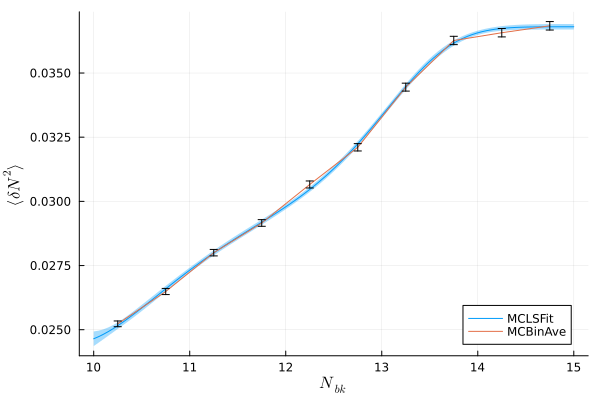

In [15]:
plot(NsPS, delNSqFitValsLogit, ribbon = delNSqErrValsLogit, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

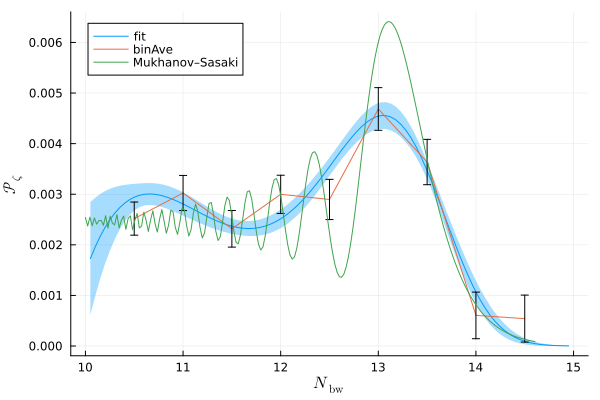

In [16]:
plot(NsPS, psFitValsLogit, ribbon = psErrValsLogit, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")

In [17]:
# fitting by the logistic+linear function
fitResult, delNSqFit, psFit, delNSqErr, psErr = FitByLS(NTotDf, "logistic+linear", 4, NsPsMin, NsPsMax, paramIni=vcat(fitResultLogit.param, 12.5))

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.03712452824645175, -7.818789148226306, 10.411918288899036, -13.448601846472672, 7.067701236208572, -1.6095735210660091, 12.618846541630578], [0.028126625250255118, 0.01907199175075411, 0.02677595768294494, 0.016760382762484705, 0.02468966733186435, 0.02923134983485795, -0.014718404409261296, 0.0018385049683899146, 0.024594267539905817, -0.005224126490710804  …  -0.04003663286980248, 0.0038815418946490134, 0.035543991481707136, 0.03440732173158348, 0.035751464712081474, 0.03286696517677632, -0.06868709091110829, 0.018417706730081366, 0.004426207819723839, -0.08666188668608832], [0.78738038248477 -0.0063622192905567546 … -0.0029169717121324892 -0.014525343716607039; 0.7309585611600993 -0.007829825777909936 … -0.003979197923983935 -0.027544749632081724; … ; 0.844137536556706 -0.004885890353205358 … -0.0018484323536037406 -0.0014285593498364535; 0.7

In [18]:
fitResult.param

7-element Vector{Float64}:
   0.03712452824645175
  -7.818789148226306
  10.411918288899036
 -13.448601846472672
   7.067701236208572
  -1.6095735210660091
  12.618846541630578

In [19]:
NsPS = LinRange(NsPsMin, NsPsMax, 100)
delNSqFitVals = [delNSqFit(N) for N in NsPS]
psFitVals = [psFit(N) for N in NsPS]
delNSqErrVals = [delNSqErr(N) for N in NsPS]
psErrVals = [psErr(N) for N in NsPS]

100-element Vector{Float64}:
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   7.966920728943724e-5
   ⋮
   0.000561549396828603
   0.000544416640611523
   0.0004979043514551124
   0.00043140442881503776
   0.00038281445326777334
   0.0004361498964804801
   0.0006399123191977818
   0.0009657865366837733
   0.0013881164148559879
   0.0018962360939346551
   0.002484572808636975
 NaN

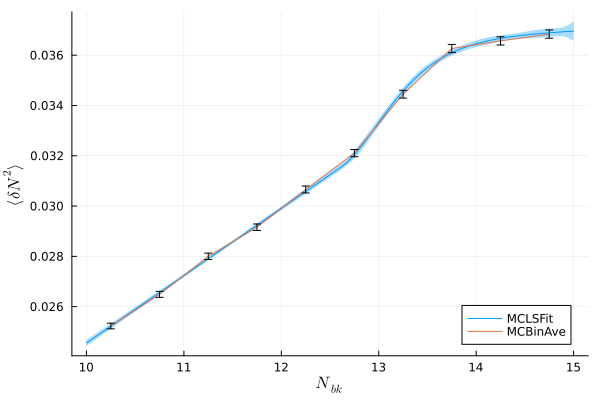

In [26]:
plot(NsPS, delNSqFitVals, ribbon = delNSqErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="MCBinAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

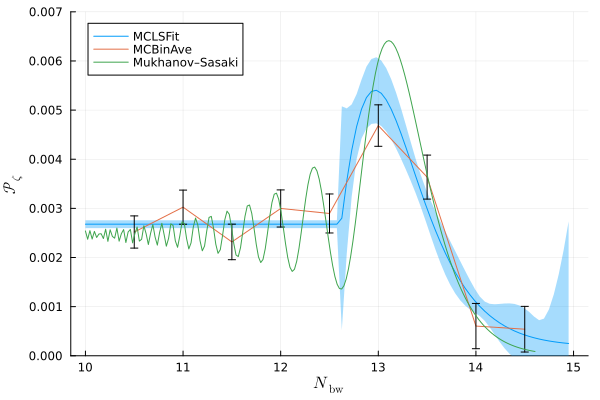

In [23]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="MCLSFit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="MCBinAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta", ylim=(0,0.007))

In [36]:
# fitting by the logistic+quadratic function
fitResultQuad, delNSqFitQuad, psFitQuad, delNSqErrQuad, psErrQuad = FitByLS(NTotDf, "logistic+quadratic", 4, NsPsMin, NsPsMax, paramIni=vcat(fitResult.param, 0.0))

(LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.12311960182401314, 0.06655541946496915, 2.072744002979315, -2.3686358660495577, 1.5067590362289158, -0.4631750765372272, 12.572309205131846, -1.1666884442109124e-5], [0.028134203585936088, 0.019077832011485916, 0.026780190351043256, 0.016744668545757995, 0.02467578857104889, 0.029148062871474242, -0.015005533140323844, 0.001975538453858651, 0.024555715592931793, -0.005221914621565148  …  -0.04031832700725453, 0.0038896001750994384, 0.0356907444671188, 0.03465772939654511, 0.03545979400035091, 0.03297328611857527, -0.0686618281303217, 0.01851253904370403, 0.004421131794702736, -0.086654486801484], [0.2375467849900467 -0.022338160566180015 … -0.009419538154179135 0.6824441134900096; 0.22070010243566937 -0.021323254814235512 … -0.018338113350211717 2.5865279666291445; … ; 0.2544935927124998 -0.023359098224327336 … -0.0004479570421381445 0.001543407

In [37]:
fitResultQuad.param

8-element Vector{Float64}:
  0.12311960182401314
  0.06655541946496915
  2.072744002979315
 -2.3686358660495577
  1.5067590362289158
 -0.4631750765372272
 12.572309205131846
 -1.1666884442109124e-5

In [38]:
delNSqFitValsQuad = [delNSqFitQuad(N) for N in NsPS]
psFitValsQuad = [psFitQuad(N) for N in NsPS]
delNSqErrValsQuad = [delNSqErrQuad(N) for N in NsPS]
psErrValsQuad = [psErrQuad(N) for N in NsPS]

100-element Vector{Float64}:
   0.0003287211269202699
   0.0003168612283498395
   0.0003050330998268315
   0.00029324058579824835
   0.00028148816234319654
   0.0002697810688863218
   0.0002581254732310933
   0.00024652867975745056
   0.0002349993939687847
   0.00022354806105102308
   0.0002121873022673058
   0.00020093248144217009
   0.0001898024450951546
   ⋮
   0.0003782471987335892
   0.0003660258944652754
   0.0003658865378513159
   0.00038947714938333735
   0.00044737204193408844
   0.0005467193789517479
   0.0006939268499283301
   0.0009000096190767173
   0.0011850795612578066
   0.0015816104290053
   0.002137066368470858
 NaN

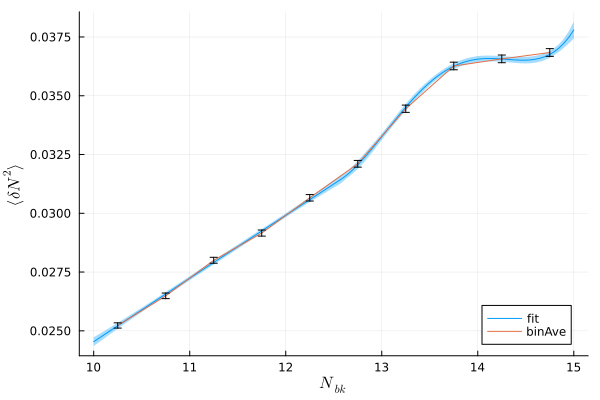

In [46]:
plot(NsPS, delNSqFitValsQuad, ribbon = delNSqErrValsQuad, fillalpha = 0.35, label="fit")
plot!(NBksdelNSq, delNSqBinAve, yerror = delNSqBinAveErr, label="binAve", legend=:bottomright, xlabel=L"N_{bk}", ylabel=L"\langle \delta N^2 \rangle")

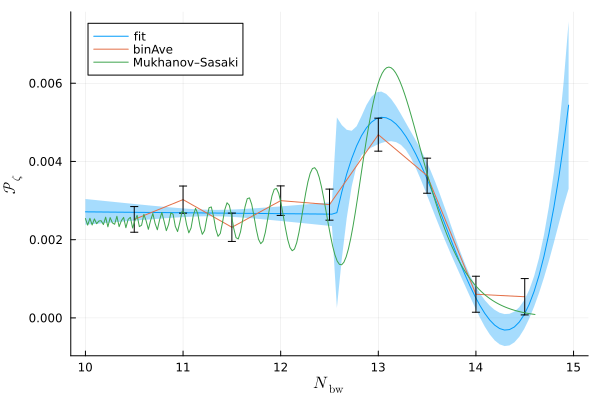

In [49]:
plot(NsPS, psFitValsQuad, ribbon = psErrValsQuad, fillalpha = 0.35, label="fit")
plot!(NBksPS, psBinAve, yerror = psBinAveErr, label="binAve", legend=:topleft, xlabel=L"N_{bk}", ylabel=L"\mathcal{P}_\zeta")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")

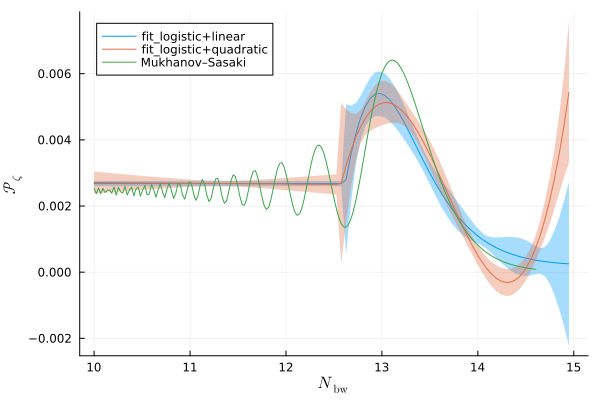

In [51]:
plot(NsPS, psFitVals, ribbon = psErrVals, fillalpha = 0.35, label="fit_logistic+linear")
plot!(NsPS, psFitValsQuad, ribbon = psErrValsQuad, fillalpha = 0.35, label="fit_logistic+quadratic")
plot!(NsPSMS, psMS, label="Mukhanov–Sasaki", legend=:topleft, xlabel=L"N_{\mathrm{bw}}", ylabel=L"\mathcal{P}_\zeta")